<a href="https://colab.research.google.com/github/timberking2/ML_magistr/blob/main/%D0%A1%D0%BC%D0%B5%D1%88%D0%BD%D1%8F%D0%B2%D0%B0%D1%8F%20%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/student-mat.csv')
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
# преобразовать категориальные признаки в category
# df['column'] = df.column.astye('category')

df['school'] = df['school'].astype('category')
df['sex'] = df['sex'].astype('category')
df['age'] = df['age'].astype('int')
df['address'] = df['address'].astype('category')
df['famsize'] = df['famsize'].astype('category')
df['Pstatus'] = df['Pstatus'].astype('category')
df['Medu'] = df['Medu'].astype('int')
df['Fedu'] = df['Fedu'].astype('int')
df['Mjob'] = df['Mjob'].astype('category')
df['Fjob'] = df['Fjob'].astype('category')
df['reason'] = df['reason'].astype('category')
df['guardian'] = df['guardian'].astype('category')
df['traveltime'] = df['traveltime'].astype('int')
df['studytime'] = df['studytime'].astype('int')
df['failures'] = df['failures'].astype('int')
df['schoolsup'] = df['schoolsup'].astype('category')
df['famsup'] = df['famsup'].astype('category')
df['paid'] = df['paid'].astype('category')
df['activities'] = df['activities'].astype('category')
df['nursery'] = df['nursery'].astype('category')
df['higher'] = df['higher'].astype('category')
df['internet'] = df['internet'].astype('category')
df['romantic'] = df['romantic'].astype('category')
df['famrel'] = df['famrel'].astype('int')
df['freetime'] = df['freetime'].astype('int')
df['goout'] = df['goout'].astype('int')
df['Dalc'] = df['Dalc'].astype('int')
df['Walc'] = df['Walc'].astype('int')
df['health'] = df['health'].astype('int')
df['absences'] = df['absences'].astype('int')
df['G1'] = df['G1'].astype('int')
df['G2'] = df['G2'].astype('int')
df['G3'] = df['G3'].astype('int')

In [ ]:
# Оставляем оригу датасета для аналитики
df_not_processed = df.copy()

In [ ]:
# Обработка категориальных признаков (все, кроме числовых)
category_columns = df.select_dtypes(include=['category']).columns.tolist()
print(f"\nКатегориальные колонки для обработки: {category_columns}")

# Применяем One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=category_columns, drop_first=True)

print(f"\nРазмерность датасета после кодирования: {df_encoded.shape}")
print(f"Колонки после кодирования (первые 10): {list(df_encoded.columns)[:10]}...")


Категориальные колонки для обработки: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Размерность датасета после кодирования: (395, 42)
Колонки после кодирования (первые 10): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc']...


In [ ]:
# Выбираем числовые признаки для масштабирования
# Все числовые признаки (включая бинарные, созданные One-Hot)
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

 Удаляем 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
 Это числовые признаки из оригинального датасета, которые мы хотим масштабировать.
 В One-Hot закодированном датасете их названия могут измениться, но они останутся числовыми.
 Мы масштабируем все числовые столбцы, кроме 'G1', 'G2', 'G3', если они есть, так как они могут быть целевыми.


In [ ]:
# Проверим, есть ли оценки G1, G2, G3
scores = [col for col in ['G1', 'G2', 'G3'] if col in df_encoded.columns]
print(f"\nОбнаружены оценки: {scores}")


Обнаружены оценки: ['G1', 'G2', 'G3']


Для кластеризации оценки G1, G2, G3 не всегда уместны, но в задании не сказано иx удалять.
Оставим их, так как они могут характеризовать профиль студента.
В реальном анализе можно было бы их исключить, если кластеризация не должна основываться на уже известных результатах.

In [ ]:
# Масштабируем все числовые признаки
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])

print("\nДатасет после масштабирования (первые 5 строк):")
print(df_scaled.head())


Датасет после масштабирования (первые 5 строк):
        age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0  1.023046  1.143856  1.360371    0.792251  -0.042286 -0.449944  0.062194   
1  0.238380 -1.600009 -1.399970   -0.643249  -0.042286 -0.449944  1.178860   
2 -1.330954 -1.600009 -1.399970   -0.643249  -0.042286  3.589323  0.062194   
3 -1.330954  1.143856 -0.479857   -0.643249   1.150779 -0.449944 -1.054472   
4 -0.546287  0.229234  0.440257   -0.643249  -0.042286 -0.449944  0.062194   

   freetime     goout      Dalc  ...  guardian_mother  guardian_other  \
0 -0.236010  0.801479 -0.540699  ...             True           False   
1 -0.236010 -0.097908 -0.540699  ...            False           False   
2 -0.236010 -0.997295  0.583385  ...             True           False   
3 -1.238419 -0.997295 -0.540699  ...             True           False   
4 -0.236010 -0.997295 -0.540699  ...            False           False   

   schoolsup_yes  famsup_yes  paid_yes  act

Выбираем признаки для кластеризации (все, кроме G1, G2, G3, если мы их не хотим использовать)
Для простоты и соответствия заданию, используем все числовые признаки

In [ ]:
X_for_clustering = df_scaled[numeric_features]

# Определяем количество кластеров (k=3)
k_initial = 3
kmeans = KMeans(n_clusters=k_initial, random_state=42, n_init=10)
cluster_labels_kmeans = kmeans.fit_predict(X_for_clustering)

# Добавляем метки кластеров в датасет для анализа
df_not_processed['Cluster_KMeans'] = cluster_labels_kmeans

print(f"Метки кластеров K-Means добавлены в df_not_processed.")
print(f"Распределение по кластерам:\n{df_not_processed['Cluster_KMeans'].value_counts().sort_index()}")

Метки кластеров K-Means добавлены в df_not_processed.
Распределение по кластерам:
Cluster_KMeans
0     98
1    146
2    151
Name: count, dtype: int64


Первый кластер у нас 98 значений, второй 146 и третий 151. Увидели, фиксируем прибыль, идем дальше в визуализацию

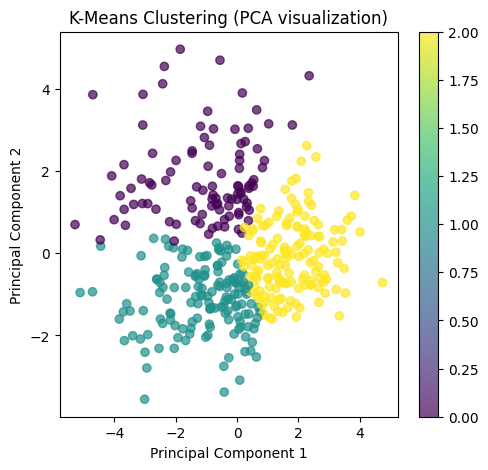

In [ ]:
# Визуализация (используем PCA для 2D)
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_for_clustering)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels_kmeans, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering (PCA visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)

Видим, что разными цветами пометились 3 разных кластера, они расположены довольно расбросанно друг от друга
Выведем статы

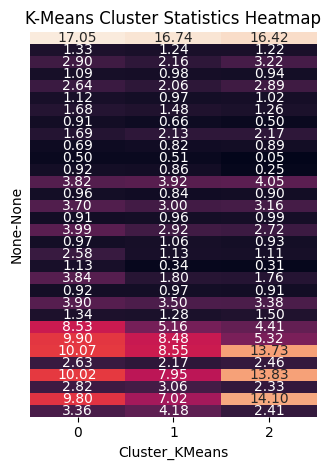

In [ ]:
# Вывод статистики по кластерам (на примере основных числовых признаков)
# Составим список признаков, которые есть в оригинальном датасете и были числовыми
original_numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
# Выберем только те, что есть в df_not_processed
available_cols = [col for col in original_numeric_cols if col in df_not_processed.columns]

if available_cols:
    df_analysis_kmeans = df_not_processed.groupby('Cluster_KMeans')[available_cols].agg(['mean', 'std']).round(2)
    plt.subplot(1, 2, 2)
    sns.heatmap(df_analysis_kmeans.T, annot=True, fmt=".2f", cbar=False, yticklabels=False)
    plt.title('K-Means Cluster Statistics Heatmap')
else:
    print("Не найдены оригинальные числовые столбцы для статистики.")
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, 'No original numeric cols\nfor heatmap', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.title('No Heatmap')

plt.tight_layout()
plt.show()

Видим по теплаку, что K-Means нашел три различных типа профилей студентов: успешные, средние и неуспевающие. Каждый кластер характеризуется уникальным набором признаков, что позволяет сделать вывод о том, какие факторы (образование родителей, время на учебу, количество отчислений) наиболее сильно коррелируют с успеваемостью студентов.

Отдадим на оценку экспертам)))



In [ ]:
# Оценка метриками
silhouette_avg_kmeans = silhouette_score(X_for_clustering, cluster_labels_kmeans)
calinski_harabasz_score_kmeans = calinski_harabasz_score(X_for_clustering, cluster_labels_kmeans)
davies_bouldin_score_kmeans = davies_bouldin_score(X_for_clustering, cluster_labels_kmeans)

print(f"\nМетрики для K-Means (k={k_initial}):")
print(f"Silhouette Score: {silhouette_avg_kmeans:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score_kmeans:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score_kmeans:.4f}")


Метрики для K-Means (k=3):
Silhouette Score: 0.1129
Calinski-Harabasz Score: 50.6386
Davies-Bouldin Score: 2.3552


Silhouette Score показывает, что кластеры слабо отделены друг от друга, есть подозрение, что структура данных не очень выражена. (диапазон от -1 до 1 получается)

По второй метрике (карабас барабас) видимо что в целом значение не такие уж и большое/маленькое, скажем среднее, что гуд
Третья метрика такая: У вас сын!
В кратце, значение чаще всего идет от нуля, потому 2.4 можно сказать что среднее? Или нельзя? Ну в целом ок короче

Танцуют локтями все (метод локтя)

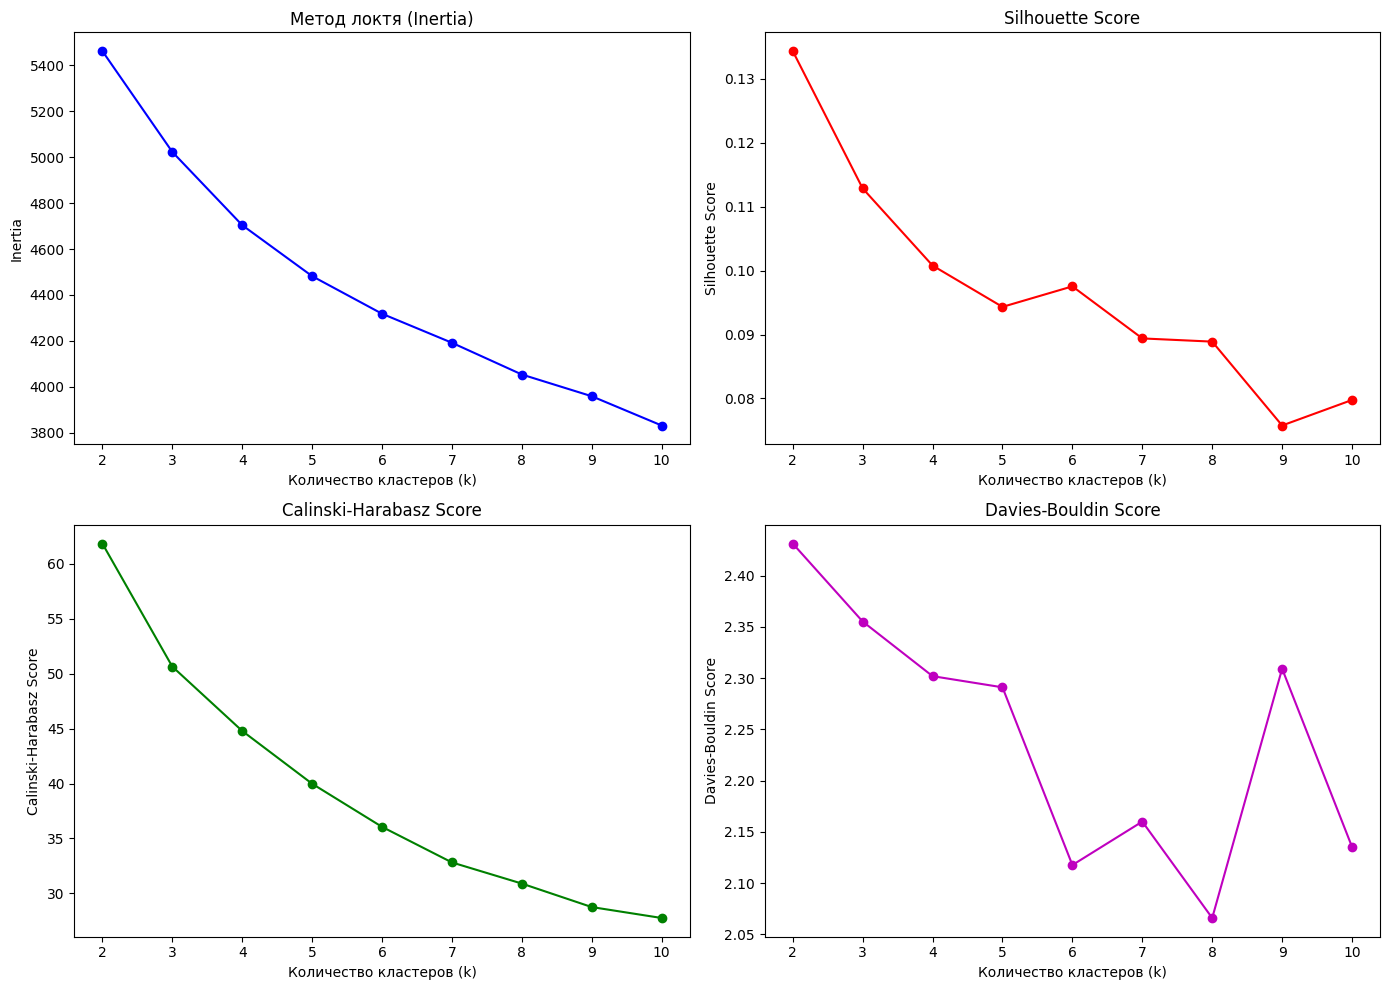

In [ ]:
K_range = range(2, 11)
inertias = []
silhouettes = []
ch_scores = []
db_scores = []

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_for_clustering)

    inertias.append(kmeans_temp.inertia_)
    silhouettes.append(silhouette_score(X_for_clustering, kmeans_temp.labels_))
    ch_scores.append(calinski_harabasz_score(X_for_clustering, kmeans_temp.labels_))
    db_scores.append(davies_bouldin_score(X_for_clustering, kmeans_temp.labels_))

# Визуализация
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.ravel()

ax[0].plot(K_range, inertias, 'bo-')
ax[0].set_title('Метод локтя (Inertia)')
ax[0].set_xlabel('Количество кластеров (k)')
ax[0].set_ylabel('Inertia')

ax[1].plot(K_range, silhouettes, 'ro-')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Количество кластеров (k)')
ax[1].set_ylabel('Silhouette Score')

ax[2].plot(K_range, ch_scores, 'go-')
ax[2].set_title('Calinski-Harabasz Score')
ax[2].set_xlabel('Количество кластеров (k)')
ax[2].set_ylabel('Calinski-Harabasz Score')

ax[3].plot(K_range, db_scores, 'mo-')
ax[3].set_title('Davies-Bouldin Score')
ax[3].set_xlabel('Количество кластеров (k)')
ax[3].set_ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

Сразу вывел всё подряд, видим шо станцевали так станцевали, на первом графике видим, что оптималка кластеров это 9, но по карабасу барабасу видим что у нас график падает, что странно... Третий у нас показывает, что вроде всё ок, но он перепил и смешно танцует теперь ыыы) Ща таблицу сделаю

In [ ]:
# Вывод метрик в таблице
metrics_comparison = pd.DataFrame({
    'k': K_range,
    'Inertia': inertias,
    'Silhouette_Score': silhouettes,
    'Calinski_Harabasz_Score': ch_scores,
    'Davies_Bouldin_Score': db_scores
})

print("\nСравнение метрик для разных k:")
print(metrics_comparison.round(4))


Сравнение метрик для разных k:
    k    Inertia  Silhouette_Score  Calinski_Harabasz_Score  \
0   2  5460.8733            0.1343                  61.8283   
1   3  5022.4089            0.1129                  50.6386   
2   4  4703.7258            0.1008                  44.7846   
3   5  4482.0683            0.0943                  39.9812   
4   6  4318.5188            0.0975                  36.0576   
5   7  4192.2551            0.0894                  32.8210   
6   8  4054.2162            0.0889                  30.8976   
7   9  3959.7249            0.0758                  28.7604   
8  10  3832.4645            0.0798                  27.7657   

   Davies_Bouldin_Score  
0                2.4312  
1                2.3552  
2                2.3019  
3                2.2910  
4                2.1177  
5                2.1600  
6                2.0660  
7                2.3091  
8                2.1354  


"Локоть" на этом графике не очень выражен. Снижение Inertia происходит достаточно плавно, без резкого излома. Это может указывать на то, что структура данных не имеет четко выраженных, сильно разделенных групп, или что оптимальное k находится в диапазоне, где снижение замедляется, но не останавливается

Далее вторая метрика, по ней оптимальным является k=2. Это означает, что данные лучше всего разделяются на два кластера, где точки внутри каждого кластера максимально похожи друг на друга и максимально отличаются от точек другого кластера.

Метрика карабаса барабаса также указывает на k=2 как оптимальное число кластеров, подтверждая результат Срулетки

По последнему графику оптимальным является k=8. Это противоречит двум предыдущим метрикам. Возможно, при k=8 кластеры становятся более компактными и менее похожими друг на друга, но общее качество разделения (как его видят карабас барабас и срулетка) при этом ухудшается.

Далее идет обучение K-metan-varit

In [ ]:
# Выбор оптимального k по метрикам
optimal_k_sil = K_range[np.argmax(silhouettes)]
print(f"\nОптимальное k по Silhouette Score: {optimal_k_sil}")
print(f"Silhouette Score для k={optimal_k_sil}: {max(silhouettes):.4f}")


Оптимальное k по Silhouette Score: 2
Silhouette Score для k=2: 0.1343


In [ ]:
# Обучаем K-Means с оптимальным k
kmeans_opt = KMeans(n_clusters=optimal_k_sil, random_state=42, n_init=10)
cluster_labels_kmeans_opt = kmeans_opt.fit_predict(X_for_clustering)
df_not_processed['Cluster_KMeans_Opt'] = cluster_labels_kmeans_opt

print(f"\nK-Means с оптимальным k ({optimal_k_sil}) выполнен.")
print(f"Распределение по оптимальным кластерам:\n{df_not_processed['Cluster_KMeans_Opt'].value_counts().sort_index()}")


K-Means с оптимальным k (2) выполнен.
Распределение по оптимальным кластерам:
Cluster_KMeans_Opt
0    230
1    165
Name: count, dtype: int64


Ну и по базе визуализация

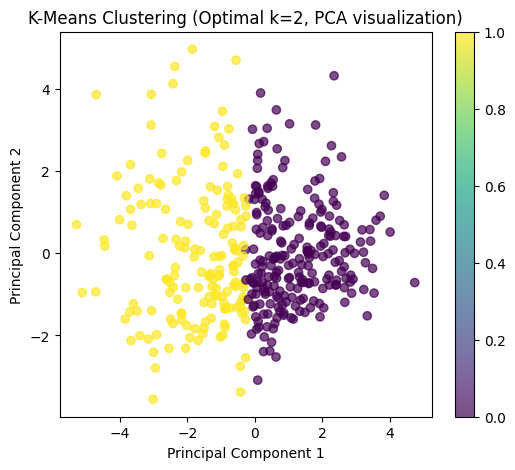

In [ ]:
# Визуализация оптимального K-Means
plt.figure(figsize=(6, 5))
scatter_opt = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels_kmeans_opt, cmap='viridis', alpha=0.7)
plt.title(f'K-Means Clustering (Optimal k={optimal_k_sil}, PCA visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_opt)
plt.show()

Из картинки пэнэгэ видим, шо кластера опять и там и сям, и даже с учетом К=2, видно, что очередные два кластера опять оч разрозненно живут, но в целом - база, как грится - не обязаны)
Далее проверим оптимуса прайма (оптимальное К) по метрикам

In [ ]:
silhouette_opt = silhouette_score(X_for_clustering, cluster_labels_kmeans_opt)
ch_score_opt = calinski_harabasz_score(X_for_clustering, cluster_labels_kmeans_opt)
db_score_opt = davies_bouldin_score(X_for_clustering, cluster_labels_kmeans_opt)

print(f"\nМетрики для оптимального K-Means (k={optimal_k_sil}):")
print(f"Silhouette Score: {silhouette_opt:.4f}")
print(f"Calinski-Harabasz Score: {ch_score_opt:.4f}")
print(f"Davies-Bouldin Score: {db_score_opt:.4f}")


Метрики для оптимального K-Means (k=2):
Silhouette Score: 0.1343
Calinski-Harabasz Score: 61.8283
Davies-Bouldin Score: 2.4312


Значения почти те же, только по карабасу барабасу чуть больше выдало, в остальном тоже самое, значит всё гуд, двигаемся дальше

In [ ]:
# Тут должен быть мем но я ленюсь, и заголовок тоже впадлу вставлять

# Подбор параметров eps и min_samples
# X_scaled уже нормализован, используем его

X_scaled_dbscan = df_scaled[numeric_features]

best_eps = None
best_min_samples = None
best_n_clusters = -1
best_silhouette = -1
results_dbscan = []

for eps in [0.3, 0.4, 0.5, 0.6, 0.7]:
    for min_samples in [3, 4, 5, 6, 7]:
        dbscan_temp = DBSCAN(eps=eps, min_samples=min_samples)
        labels_temp = dbscan_temp.fit_predict(X_scaled_dbscan)

        n_clusters_temp = len(set(labels_temp)) - (1 if -1 in labels_temp else 0)
        n_noise_temp = list(labels_temp).count(-1)

        # Считаем метрики только если есть > 1 кластера и < количества точек
        unique_labels_temp = set(labels_temp)
        if n_clusters_temp > 1 and n_clusters_temp < len(X_scaled_dbscan):
            sil_temp = silhouette_score(X_scaled_dbscan, labels_temp)
        else:
            sil_temp = -2 # Невалидное значение

        results_dbscan.append({'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters_temp, 'n_noise': n_noise_temp, 'silhouette': sil_temp})

        # Обновляем лучшие параметры по Silhouette Score
        if sil_temp > best_silhouette:
            best_silhouette = sil_temp
            best_eps = eps
            best_min_samples = min_samples
            best_n_clusters = n_clusters_temp

results_df = pd.DataFrame(results_dbscan)
print("\nРезультаты подбора параметров DBSCAN:")
print(results_df.sort_values(by='silhouette', ascending=False).head(10))

print(f"\nЛучшие параметры DBSCAN: eps={best_eps}, min_samples={best_min_samples}")
print(f"Количество кластеров: {best_n_clusters}, Количество шумовых точек: {list(dbscan_temp.labels_).count(-1) if best_eps else 'N/A'}, Silhouette Score: {best_silhouette:.4f}")


Результаты подбора параметров DBSCAN:
   eps  min_samples  n_clusters  n_noise  silhouette
0  0.3            3           0      395          -2
1  0.3            4           0      395          -2
2  0.3            5           0      395          -2
3  0.3            6           0      395          -2
4  0.3            7           0      395          -2
5  0.4            3           0      395          -2
6  0.4            4           0      395          -2
7  0.4            5           0      395          -2
8  0.4            6           0      395          -2
9  0.4            7           0      395          -2

Лучшие параметры DBSCAN: eps=None, min_samples=None
Количество кластеров: -1, Количество шумовых точек: N/A, Silhouette Score: -1.0000


Круто, у меня нет кластеров, делаем делаем
Пошумим БЛИН получается, как фиксить?

Или точки слишком равномерно распределены, или нет достаточно больших групп точек, находящихся вблизи друг друга в многомерном пространстве при выбранных параметрах... Получается скип?))

In [ ]:
# Пробуем обучить дебильный скан
if best_eps is not None:
    dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    cluster_labels_dbscan = dbscan_final.fit_predict(X_scaled_dbscan)

    # Добавляем метки кластеров в датасет для анализа
    df_not_processed['Cluster_DBSCAN'] = cluster_labels_dbscan

    print(f"\nDBSCAN с параметрами eps={best_eps}, min_samples={best_min_samples} выполнен.")
    print(f"Распределение по кластерам (включая шум -1):\n{df_not_processed['Cluster_DBSCAN'].value_counts().sort_index()}")

    # Визуализация DBSCAN
    plt.figure(figsize=(6, 5))
    scatter_dbs = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels_dbscan, cmap='viridis', alpha=0.7)
    plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples}, PCA visualization)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter_dbs)
    plt.show()

    # Оценка метриками (исключая шумовые точки -1)
    mask_valid_dbscan = cluster_labels_dbscan != -1
    X_valid_dbscan = X_scaled_dbscan[mask_valid_dbscan]
    labels_valid_dbscan = cluster_labels_dbscan[mask_valid_dbscan]

    if len(set(labels_valid_dbscan)) > 1:
        silhouette_dbscan = silhouette_score(X_valid_dbscan, labels_valid_dbscan)
        ch_score_dbscan = calinski_harabasz_score(X_valid_dbscan, labels_valid_dbscan)
        db_score_dbscan = davies_bouldin_score(X_valid_dbscan, labels_valid_dbscan)

        print(f"\nМетрики для DBSCAN (без шума):")
        print(f"Silhouette Score: {silhouette_dbscan:.4f}")
        print(f"Calinski-Harabasz Score: {ch_score_dbscan:.4f}")
        print(f"Davies-Bouldin Score: {db_score_dbscan:.4f}")
    else:
        print("\nПосле удаления шума остался один кластер или не осталось кластеров. Метрики не рассчитываются.")
else:
    print("\nНе удалось найти подходящие параметры для DBSCAN.")


Не удалось найти подходящие параметры для DBSCAN.


Ура победа получается)

In [ ]:
comparison_results = {
    'Method': ['K-Means (Initial k=3)', f'K-Means (Optimal k={optimal_k_sil})', 'DBSCAN'],
    'Silhouette Score': [
        silhouette_avg_kmeans,
        silhouette_opt,
        silhouette_dbscan if 'silhouette_dbscan' in locals() else 'N/A'
    ],
    'Calinski-Harabasz Score': [
        calinski_harabasz_score_kmeans,
        ch_score_opt,
        ch_score_dbscan if 'ch_score_dbscan' in locals() else 'N/A'
    ],
    'Davies-Bouldin Score': [
        davies_bouldin_score_kmeans,
        db_score_opt,
        db_score_dbscan if 'db_score_dbscan' in locals() else 'N/A'
    ],
    'Number of Clusters': [
        k_initial,
        optimal_k_sil,
        best_n_clusters if best_n_clusters is not None else 'N/A'
    ]
}

comparison_df = pd.DataFrame(comparison_results)
print("\nСравнение метрик:")
print(comparison_df.round(4) if comparison_df.iloc[0,1] != 'N/A' else comparison_df)


Сравнение метрик:
                  Method Silhouette Score Calinski-Harabasz Score  \
0  K-Means (Initial k=3)         0.112854               50.638618   
1  K-Means (Optimal k=2)         0.134335               61.828348   
2                 DBSCAN              N/A                     N/A   

  Davies-Bouldin Score  Number of Clusters  
0              2.35518                   3  
1             2.431214                   2  
2                  N/A                  -1  


В целом круто, что я смог обучить необучаемое
Итог таков, у нас есть получается Silhouette Score (срулетка), Calinski-Harabasz (карабас барабас)  и K-Means (ка минс), а дбскан мимо, он попущен
Получается по финальным данным видим, что после ручного прикола я проверил все по двум кластерам, и в ходе анализа я понял что при высоких значениях у нас обсёр а при двух кластерах всё круто т.к. +- оптимальные значения метрик, воооот
Подходит лучше ка минс пушто дб скан попущен

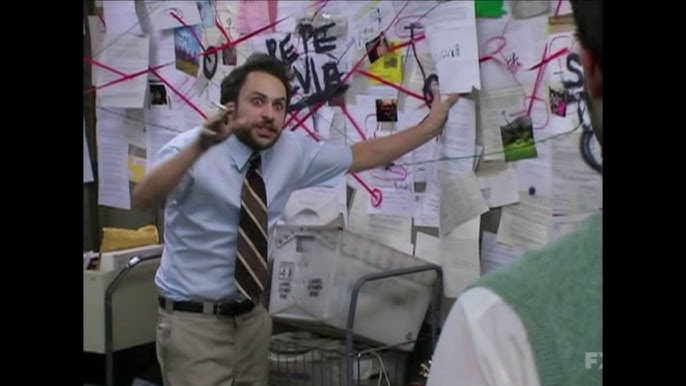